<a href="https://colab.research.google.com/github/visiont3lab/machine-learning-course/blob/main/classification/Project_Covid_Mask_Classifier_Part1_Class_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Project Part1: Mask-NoMask Classifier

Class notes

In [ ]:
# Scaricare il repositorio da github per avere accesso alle immagini
!git clone https://github.com/visiont3lab/covid-mask-classifier.git

fatal: destination path 'covid-mask-classifier' already exists and is not an empty directory.


In [ ]:
# Pillow --> Pytorch
# Opencv --> c++ --pyhton

!pip install Pillow
!pip install opencv-python
!pip list | grep opencv

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image

cartella_padre = "/content/covid-mask-classifier/dataset/"
cartelle = ["mask", "no-mask"]
stat = {"mask": 0, "no-mask": 1}

X = []
Y = []

for nome_cartella in cartelle:

  cartella = os.path.join(cartella_padre,nome_cartella)

  names = os.listdir(cartella)

  for name in names:
    filepath = os.path.join(cartella,name)

    # Leggi l'immagine  cv2.IMREAD_GRAYSCALE cv2.IMREAD_UNCHANGED cv2.IMREAD_GRAYSCALE <--  BGR --> RGB
    im_np = cv2.imread( filepath, cv2.IMREAD_COLOR ) 
    
    #  BGR 2 RGB
    im_np = cv2.cvtColor(im_np, cv2.COLOR_BGR2RGB)

    # Resize
    im_np = cv2.resize(im_np, (64,64))

    # metto tutto su una riga
    riga = im_np.reshape(-1)

    # Aggiungo i valori ai miei vettori
    X.append(riga)
    Y.append(stat[nome_cartella])


In [ ]:
# train test split -- Cross validation 
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,shuffle= True, test_size=0.2) 

In [ ]:
# Creare la nostra pipeline
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import joblib

# Creazione del modello
pipe = Pipeline([
      ("normalize", MinMaxScaler(feature_range=(0,1))),    
      ("pca", PCA(n_components=0.99)),
      ("model", SVC()),
])

# Allenamento
pipe.fit(X_train,Y_train)

# Test
Y_hat_test = pipe.predict(X_test)

# Salvataggio
joblib.dump(pipe, "model.pkl")


['model.pkl']

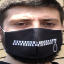

[0]


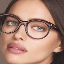

[1]


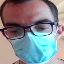

[0]


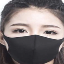

[0]


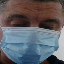

[0]


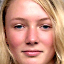

[1]


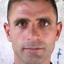

[1]


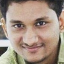

[1]


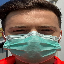

[0]


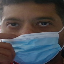

[0]


In [ ]:
# Visualizzazione
for i in range(0,10): #len(Y_test)):
  Y_hat_test = pipe.predict(X_test[i].reshape(1,-1))
  display(Image.fromarray( X_test[i].reshape(64,64,3) ) )
  print(Y_hat_test)

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score
import pandas as pd

Y_hat_train = pipe.predict(X_train)
Y_hat_test = pipe.predict(X_test)

c_train = confusion_matrix(Y_train, Y_hat_train)
c_test = confusion_matrix(Y_test, Y_hat_test)

df_train = pd.DataFrame(c_train, columns=["Pred-Mask","Pred-No-Mask"], index=["Real-Mask","Real-No-Mask"])
df_test = pd.DataFrame(c_test, columns=["Pred-Mask","Pred-No-Mask"], index=["Real-Mask","Real-No-Mask"])

display(df_train)
display(df_test)

accuracy_train = accuracy_score(Y_train, Y_hat_train)
accuracy_test = accuracy_score(Y_test, Y_hat_test)
recall_train = recall_score(Y_train, Y_hat_train)
recall_test = recall_score(Y_test, Y_hat_test)
precision_train = precision_score(Y_train, Y_hat_train)
precision_test = precision_score(Y_test, Y_hat_test)
f1score_train = f1_score(Y_train, Y_hat_train)
f1score_test = f1_score(Y_test, Y_hat_test)

print("accuracy_train: ", accuracy_train)
print("accuracy_test: ", accuracy_test)
print("recall_train: ", recall_train)
print("recall_test: ", recall_test)
print("precision_train: ", precision_train)
print("precision_test: ", precision_test)
print("f1score_train: ", f1score_train)
print("f1score_test: ", f1score_test)


,Pred-Mask,Pred-No-Mask
Real-Mask,390,4
Real-No-Mask,0,405


,Pred-Mask,Pred-No-Mask
Real-Mask,97,8
Real-No-Mask,1,94


accuracy_train:  0.9949937421777222
accuracy_test:  0.955
recall_train:  1.0
recall_test:  0.9894736842105263
precision_train:  0.9902200488997555
precision_test:  0.9215686274509803
f1score_train:  0.995085995085995
f1score_test:  0.9543147208121827


## Theory

| Risultato Esatto   | Risulato Predetto |  |
|------------|---------------------------|--|
|            |   Negativo | Positivo |
|Negativo    |    TN=97750     |    FP=150    |
|Positivo    |    FN=330      |    TP=1770    |



* Accuracy = $\frac{TP+TN}{TP+TN+FP+FN}$

* Recall = $\frac{TP}{TP+FN}$

* Precision = $\frac{TP}{TP+FP}$

* F1 = $\frac{2*Precision*recall}{Precision+Recall}$